In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re as r
import matplotlib

In [54]:
%matplotlib inline

In [55]:
df_flag = pd.read_csv("flag_data.csv", encoding = 'utf-8')
df_countries = pd.read_csv("countries.csv", encoding = 'utf-8')
df_countries = df_countries.drop([0])
df_countries = df_countries.rename(columns = {"Unnamed: 0":"Name"})

In [56]:
 pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_flag['Name'] = df_flag['Name'].replace('-',' ', regex = True)
df_countries['Name'] = df_countries['Name'].str.strip()
df_flag.set_index('Name')
df_countries.set_index('Name')

population area_sqkm pop per sqkm  \
Name                                                                   
Afghanistan                          31056997    647500  47.96447413   
Albania                               3581655     28748  124.5879713   
Algeria                              32930091   2381740  13.82606456   
American Samoa                          57794       199  290.4221106   
Andorra                                 71201       468  152.1388889   
Angola                               12127071   1246700   9.72733697   
Anguilla                                13477       102   132.127451   
Antigua and Barbuda                     69108       443          156   
Argentina                            39921833   2766890  14.42841349   
Armenia                               2976372     29800  99.87825503   
Aruba                                   71891       193   372.492228   
Australia                            20264082   7686850  2.636201045   
Austria                               8192880     83870   97.6854656   
Azerbaijan                            7961619     86600  91.93555427   
Bahamas, The                           303770     13940  21.79124821   
Bahrain                                698585       665  1050.503759   
Bangladesh                          147365352    144000    1023.3705   
Barbados                               279912       431  649.4477958   
Belarus                              10293011    207600  49.58097784   
Belgium                              10379067     30528  339.9851612   
Belize                                 287730     22966  12.52852042   
Benin                                 7862944    112620  69.81836264   
Bermuda                                 65773        53         1241   
Bhutan                                2279723     47000  48.50474468   
Bolivia                               8989046   1098580  8.182422764   
Bosnia and Herzegovina                4498976     51129  87.99264605   
Botswana                              1639833    600370  2.731370655   
Brazil                              188078227   8511965  22.09574722   
British Virgin Isles                    23098       153  150.9673203   
Brunei                                 379444      5770  65.76152513   
Bulgaria                              7385367    110910  66.58882878   
Burkina                              13902972    274200  50.70376368   
Burma                                47382633    678500  69.83438909   
Burundi                               8090068     27830  290.6959396   
Cambodia                             13881427    181040  76.67602187   
Cameroon                             17340702    475440  36.47295558   
Canada                               33098932   9984670  3.314975057   
Cape Verde Islands                     420979      4033  104.3835854   
Cayman Islands                          45436       262  173.4198473   
Central African Republic              4303356    622984  6.907650919   
Chad                                  9944201   1284000  7.744704829   
Chile                                16134219    756950  21.31477508   
China                              1313973713   9596960  136.9156184   
Christmas Island                         1493       135  11.05925926   
Cocos (Keeling) Islands                   574        14           41   
Colombia                             43593035   1138910  38.27610171   
Comoros                                690948      2170  318.4092166   
Congo, Democratic Republic of the    62660551   2345410   26.7162462   
Congo, Republic of the                3702314    342000  10.82547953   
Cook Islands                            21388       240  89.11666667   
Costa Rica                            4075261     51100   79.7507045   
Cote d'Ivoire                        17654843    322460  54.75048998   
Croatia                               4494749     56542  79.49398677   
Cuba                                 11382820    110860   102.677431   
Cyp

In [77]:
joined = pd.merge(df_flag, df_countries, on=['Name'], how='left')
dropped = joined.dropna(axis=0, subset = ['coastline_km', 'coast2area'])


In [79]:
 #167 rows of countries with coastline data available
dropped[["gdpcap","birthrate", "coastline_km","coast2area","deathrate"]].astype(float)
dropped

Name  Continent  Zone  Area  Population  Language  \
0                 Afghanistan          5     1   648          16        10   
1                     Albania          3     1    29           3         6   
2                     Algeria          4     1  2388          20         8   
3              American Samoa          6     3     0           0         1   
4                     Andorra          3     1     0           0         6   
5                      Angola          4     2  1247           7        10   
6                    Anguilla          1     4     0           0         1   
8                   Argentina          2     3  2777          28         2   
10                  Australia          6     2  7690          15         1   
11                    Austria          3     1    84           8         4   
13                    Bahrain          5     1     1           0         8   
14                 Bangladesh          5     1   143          90         6   
15                   Barbados          1     4     0           0         1   
16                    Belgium          3     1    31          10         6   
17                     Belize          1     4    23           0         1   
18                      Benin          4     1   113           3         3   
19                    Bermuda          1     4     0           0         1   
20                     Bhutan          5     1    47           1        10   
21                    Bolivia          2     3  1099           6         2   
22                   Botswana          4     2   600           1        10   
23                     Brazil          2     3  8512         119         6   
24       British Virgin Isles          1     4     0           0         1   
25                     Brunei          5     1     6           0        10   
26                   Bulgaria          3     1   111           9         5   
27                    Burkina          4     4   274           7         3   
28                      Burma          5     1   678          35        10   
29                    Burundi          4     2    28           4        10   
30                   Cameroon          4     1   474           8         3   
31                     Canada          1     4  9976          24         1   
32         Cape Verde Islands          4     4     4           0         6   
33             Cayman Islands          1     4     0           0         1   
34   Central African Republic          4     1   623           2        10   
35                       Chad          4     1  1284           4         3   
36                      Chile          2     3   757          11         2   
37                      China          5     1  9561        1008         7   
38                   Colombia          2     4  1139          28         2   
41               Cook Islands          6     3     0           0         1   
42                 Costa Rica          1     4    51           2         2   
43                       Cuba          1     4   115          10         2   
44                     Cyprus          3     1     9           1         6   
46                    Denmark          3     1    43           5         6   
47                   Djibouti          4     1    22           0         3   
48                   Dominica          1     4     0           0         1   
49         Dominican Republic          1     4    49           6         2   
50                    Ecuador          2     3   284           8         2   
51                      Egypt          4     1  1001          47         8   
52                El Salvador          1     4    21           5         2   
53          Equatorial Guinea          4     1    28           0        10   
54                   Ethiopia          4     1  1222          31        10   
57                       Fiji          6     2    18           1         1   
58                    Finland          3     1 

In [75]:
len(dropped)

167

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [112]:
lr = LogisticRegression()
train, test = train_test_split(dropped)

In [113]:
lr.fit(train[['coastline_km', 'coast2area']], train["blue"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
(lr.score(train[['coastline_km', 'coast2area']], train["blue"]),
lr.score(test[['coastline_km', 'coast2area']], test["blue"]))

(0.504, 0.5714285714285714)

In [115]:
pipe = Pipeline([
    ("poly", PolynomialFeatures(2)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])

In [116]:
pipe.fit(train[['coastline_km', 'coast2area']], train["blue"])

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [117]:
pipe.score(test[['coastline_km', 'coast2area']], test["blue"])

0.6666666666666666

In [118]:
pipe["lr"].coef_

array([[ 0.        ,  0.02135664,  0.3963261 , -0.4418363 ,  0.19296227,
        -0.36592943]])

In [119]:
cm = confusion_matrix(dropped["blue"], pipe.predict(dropped[['coastline_km', 'coast2area']]))
cm

array([[62, 20],
       [54, 31]])

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ax = dropped.plot.scatter(x="coastline_km", y="coast2area", vmin=-1)
#ax = plt.scatter(dropped[''],dropped[''],vmin=-1)
#x, y = np.meshgrid(np.arange(-3, ax.get_xlim()[1],0.01),
                   #np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.01))
#xy = np.hstack((x.reshape(-1,1), y.reshape(-1,1)))
#z = pipe.predict(xy).reshape(x.shape)
#z = pipe.predict(dropped[['coastline_km', 'coast2area']]).reshape(-1,1)
#plt.contourf(x,y ,z, alpha=0.1, cmap="binary")

In [96]:
df_countries

Name  population area_sqkm pop per sqkm  \
1                          Afghanistan    31056997    647500  47.96447413   
2                              Albania     3581655     28748  124.5879713   
3                              Algeria    32930091   2381740  13.82606456   
4                       American Samoa       57794       199  290.4221106   
5                              Andorra       71201       468  152.1388889   
6                               Angola    12127071   1246700   9.72733697   
7                             Anguilla       13477       102   132.127451   
8                  Antigua and Barbuda       69108       443          156   
9                            Argentina    39921833   2766890  14.42841349   
10                             Armenia     2976372     29800  99.87825503   
11                               Aruba       71891       193   372.492228   
12                           Australia    20264082   7686850  2.636201045   
13                             Austria     8192880     83870   97.6854656   
14                          Azerbaijan     7961619     86600  91.93555427   
15                        Bahamas, The      303770     13940  21.79124821   
16                             Bahrain      698585       665  1050.503759   
17                          Bangladesh   147365352    144000    1023.3705   
18                            Barbados      279912       431  649.4477958   
19                             Belarus    10293011    207600  49.58097784   
20                             Belgium    10379067     30528  339.9851612   
21                              Belize      287730     22966  12.52852042   
22                               Benin     7862944    112620  69.81836264   
23                             Bermuda       65773        53         1241   
24                              Bhutan     2279723     47000  48.50474468   
25                             Bolivia     8989046   1098580  8.182422764   
26              Bosnia and Herzegovina     4498976     51129  87.99264605   
27                            Botswana     1639833    600370  2.731370655   
28                              Brazil   188078227   8511965  22.09574722   
29                British Virgin Isles       23098       153  150.9673203   
30                              Brunei      379444      5770  65.76152513   
31                            Bulgaria     7385367    110910  66.58882878   
32                             Burkina    13902972    274200  50.70376368   
33                               Burma    47382633    678500  69.83438909   
34                             Burundi     8090068     27830  290.6959396   
35                            Cambodia    13881427    181040  76.67602187   
36                            Cameroon    17340702    475440  36.47295558   
37                              Canada    33098932   9984670  3.314975057   
38                  Cape Verde Islands      420979      4033  104.3835854   
39                      Cayman Islands       45436       262  173.4198473   
40            Central African Republic     4303356    622984  6.907650919   
41                                Chad     9944201   1284000  7.744704829   
42                               Chile    16134219    756950  21.31477508   
43                               China  1313973713   9596960  136.9156184   
44                    Christmas Island        1493       135  11.05925926   
45             Cocos (Keeling) Islands         574        14           41   
46                            Colombia    43593035   1138910  38.27610171   
47                             Comoros      690948      2170  318.4092166   
48   Congo, Democratic Republic of the    62660551   2345410   26.7162462   
49              Congo, Republic of the     3702314    342000  10.82547953   
50                        Cook Islands       21388       240  89.11666667   
51                          Costa Rica     4075261     51100   79.7507045   
52                       Cote 

In [97]:
countries_1 = df_countries.dropna(axis=0, subset = ["birthrate","deathrate"])
countries_2 = df_countries.dropna(axis=0, subset = ["birthrate","gdpcap"])

In [98]:
from sklearn.linear_model import LinearRegression

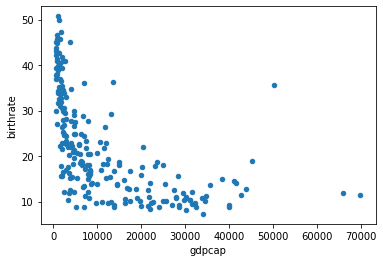

In [101]:
countries_1 = countries_1[["gdpcap","birthrate", "coastline_km","coast2area","deathrate"]].astype(float)
countries_1.plot.scatter(x = "gdpcap",y = "birthrate")

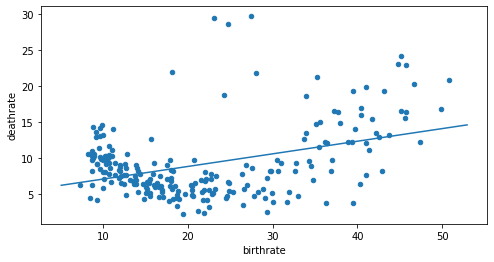

In [104]:
r = LinearRegression()
r.fit(np.array(countries_1["birthrate"]).reshape(-1,1),np.array(countries_1["deathrate"]).reshape(-1,1))
ax = countries_1.plot.scatter(x = "birthrate", y = "deathrate",figsize=(8, 4))
y0 = ax.get_xlim()[0]*r.coef_.item() + r.intercept_.item()
y1 = ax.get_xlim()[1]*r.coef_.item()+ r.intercept_.item()
ax.plot(ax.get_xlim(),[y0,y1])

In [105]:
r.coef_

array([[0.17554235]])

In [106]:
len(countries_1)

224